# Exercise notebook 3: Transforming and Combining Data

This Jupyter notebook is for Week 3 of The Open University's [_Learn to code for Data Analysis_](http://futurelearn.com/courses/learn-to-code) course.

This notebook has all Week 3 code examples and coding exercises. Remember to start by running the code in this notebook. You will need to add a code cell below each task to complete it.

You'll come across steps in the FutureLearn course directing you to this notebook. Once you've done the exercise, go back to FutureLearn to discuss it with your fellow learners and course facilitators and mark it as complete.

In [54]:
from pandas import *

## Exercise 1: Creating the data

Dataframes can be constructed from scratch as follows.

In [55]:
headings = ['Country', 'GDP (US$)']
table = [
  ['UK', 2678454886796.7],    # 1st row
  ['USA', 16768100000000.0],  # 2nd row
  ['China', 9240270452047.0], # and so on...
  ['Brazil', 2245673032353.8],
  ['South Africa', 366057913367.1]
]
gdp = DataFrame(columns=headings, data=table)
gdp

,Country,GDP (US$)
0,UK,2.678455e+12
1,USA,1.676810e+13
2,China,9.240270e+12
3,Brazil,2.245673e+12
4,South Africa,3.660579e+11


And similarly for the life expectancy of those born in 2013...

In [56]:
headings = ['Country name', 'Life expectancy (years)']
table = [
  ['China', 75],
  ['Russia', 71],  
  ['United States', 79],
  ['India', 66],
  ['United Kingdom', 81]
]
life = DataFrame(columns=headings, data=table)
life

,Country name,Life expectancy (years)
0,China,75
1,Russia,71
2,United States,79
3,India,66
4,United Kingdom,81


### Task

Create a dataframe with all five BRICS countries and their population, in thousands of inhabitants, in 2013. The values (given in week 1) are: Brazil 200362, Russian Federation	142834, India 1252140, China 1393337, South Africa 52776.

In [57]:
table = [
    ['Brazil', 200362],
    ['Russian Federation', 142834],
    ['India', 1252140],
    ['China', 1393337],
    ['South Africa', 52776]
]
headings = ['Country', 'Population']
brics = DataFrame(columns=headings, data=table)
brics


,Country,Population
0,Brazil,200362
1,Russian Federation,142834
2,India,1252140
3,China,1393337
4,South Africa,52776


**Now go back to the Exercise 1 step in FutureLearn to discuss and mark it complete.**

## Exercise 2: Defining functions

The following function, written in two different ways, rounds a number to the nearest million. It calls the Python function `round()` which rounds a decimal number to the nearest integer.

In [58]:
def roundToMillions (value):
    result = round(value / 1000000)
    return result

In [59]:
def roundToMillions (value):
    return round(value / 1000000)

To test a function, write expressions that check for various argument values whether the function returns the expected value in each case.

In [60]:
roundToMillions(4567890.1) == 5

True

In [61]:
roundToMillions(0) == 0  # always test with zero...

True

In [62]:
roundToMillions(-1) == 0 # ...and negative numbers

True

In [63]:
roundToMillions(1499999) == 1 # test rounding to the nearest

True

The next function converts US dollars to British pounds.

In [64]:
def usdToGBP (usd):
    return usd / 1.564768 # average rate during 2013 

usdToGBP(0) == 0

True

In [65]:
usdToGBP(1.564768) == 1

True

In [66]:
usdToGBP(-1) < 0

True

### Tasks

- Define a few more test cases for both functions.
- Write a function to convert US dollars to your local currency. Look up online what was the average exchange rate in 2013.
- Why can't you use `roundToMillions()` to round the population to millions of inhabitants? Write a new function and test it.

**Now go back to the Exercise 2 step in FutureLearn to discuss and mark it complete.**

## Exercise 3: What if...?

The next function uses the full form of the conditional statement to expand the abbreviated country names UK and USA and leave other names unchanged.

In [67]:
def expandCountry (name):
    if name == 'UK':
        return 'United Kingdom'
    elif name == 'USA':
        return 'United States'
    elif name == 'St. Lucia':
        return 'Saint Lucia'
    else:
        return name

expandCountry('St. Lucia') == 'Saint Lucia'

True

Here is the same function, written differently, using the simplest form of the conditional statement, without the `elif` and `else` parts.

In [68]:
def expandCountry (name):
    if name == 'UK':
        name = 'United Kingdom'
    if name == 'USA':
        name = 'United States'
    if name == 'St. Lucia':
        name = 'Saint Lucia'  
    return name

expandCountry('St. Lucia') == 'Saint Lucia'

True

### Tasks

1. Write more tests.
- Explain why the second version of the function works. Note how the code is indented.
- Extend both versions to expand 'St. Lucia' to 'Saint Lucia'.
- Write a function to translate some country names from their original language to English, e.g. 'Brasil' to 'Brazil', 'España' to 'Spain' and 'Deutschland' to 'Germany'.
- Can you think of a different way of expanding abbreviated country names? Hint: this is a course about data tables.

**Now go back to the Exercise 3 step in FutureLearn to discuss and mark it complete.**

## Exercise 4: Applying functions

A one-argument function can be applied to each cell in a column, in order to obtain a new column with the converted values.

In [69]:
gdp['Country name'] = gdp['Country'].apply(expandCountry)
gdp

,Country,GDP (US$),Country name
0,UK,2.678455e+12,United Kingdom
1,USA,1.676810e+13,United States
2,China,9.240270e+12,China
3,Brazil,2.245673e+12,Brazil
4,South Africa,3.660579e+11,South Africa


Given that `apply()` is a column method that returns a column, it can be **chained**, to apply several conversions in one go.

In [70]:
gdp['GDP (£m)'] = gdp['GDP (US$)'].apply(usdToGBP).apply(roundToMillions)
gdp

,Country,GDP (US$),Country name,GDP (£m)
0,UK,2.678455e+12,United Kingdom,1711727
1,USA,1.676810e+13,United States,10716029
2,China,9.240270e+12,China,5905202
3,Brazil,2.245673e+12,Brazil,1435148
4,South Africa,3.660579e+11,South Africa,233937


Applying the conversion functions in a different order will lead to a different result.

In [71]:
gdp['GDP (US$)'].apply(roundToMillions).apply(usdToGBP).apply(round)

0     1711727
1    10716029
2     5905201
3     1435148
4      233938
Name: GDP (US$), dtype: float64

The original columns can be discarded.

In [72]:
headings = ['Country name', 'GDP (£m)']
gdp = gdp[headings]
gdp

,Country name,GDP (£m)
0,United Kingdom,1711727
1,United States,10716029
2,China,5905202
3,Brazil,1435148
4,South Africa,233937


### Task

Take the dataframe you created for Exercise 1, and apply to its population column the rounding function you wrote in Exercise 2.

In [73]:
brics['Population'] = brics['Population'].apply(roundToMillions)
brics

,Country,Population
0,Brazil,0
1,Russian Federation,0
2,India,1
3,China,1
4,South Africa,0


**Now go back to the Exercise 4 step in FutureLearn to discuss and mark it complete.**

## Exercise 5: Joining left, right and centre

At this point, both tables have a common column, 'Country name', with fully expanded country names.

In [74]:
life

,Country name,Life expectancy (years)
0,China,75
1,Russia,71
2,United States,79
3,India,66
4,United Kingdom,81


In [75]:
gdp

,Country name,GDP (£m)
0,United Kingdom,1711727
1,United States,10716029
2,China,5905202
3,Brazil,1435148
4,South Africa,233937


A **left join** takes the rows of the left table and adds the columns of the right table. 

In [76]:
merge(gdp, life, on='Country name', how='left')

,Country name,GDP (£m),Life expectancy (years)
0,United Kingdom,1711727,81
1,United States,10716029,79
2,China,5905202,75
3,Brazil,1435148,NaN
4,South Africa,233937,NaN


A **right join** takes the rows from the right table, and adds the columns of the left table.

In [77]:
merge(gdp, life, on='Country name', how='right')

,Country name,GDP (£m),Life expectancy (years)
0,United Kingdom,1711727,81
1,United States,10716029,79
2,China,5905202,75
3,Russia,NaN,71
4,India,NaN,66


An **outer join** takes the union of the rows, i.e. it has all the rows of the left and right joins.

In [78]:
merge(gdp, life, on='Country name', how='outer')

,Country name,GDP (£m),Life expectancy (years)
0,United Kingdom,1711727,81
1,United States,10716029,79
2,China,5905202,75
3,Brazil,1435148,NaN
4,South Africa,233937,NaN
5,Russia,NaN,71
6,India,NaN,66


An **inner join** takes the intersection of the rows (i.e. the common rows) of the left and right joins.

In [79]:
gdpVsLife = merge(gdp, life, on='Country name', how='inner')
gdpVsLife

,Country name,GDP (£m),Life expectancy (years)
0,United Kingdom,1711727,81
1,United States,10716029,79
2,China,5905202,75


### Task

Join your population dataframe (from Exercise 4) with `gdpVsLife`, in four different ways, and note the differences.

In [80]:
# brics is my dataframe; needs Country name column
brics.columns = ['Country name', 'Population']
brics

,Country name,Population
0,Brazil,0
1,Russian Federation,0
2,India,1
3,China,1
4,South Africa,0


#### LEFT Join

In [81]:
merge(gdpVsLife, brics, on='Country name', how='left')

,Country name,GDP (£m),Life expectancy (years),Population
0,United Kingdom,1711727,81,NaN
1,United States,10716029,79,NaN
2,China,5905202,75,1


#### RIGHT Join

In [82]:
merge(gdpVsLife, brics, on='Country name', how='right')

,Country name,GDP (£m),Life expectancy (years),Population
0,China,5905202,75,1
1,Brazil,NaN,NaN,0
2,Russian Federation,NaN,NaN,0
3,India,NaN,NaN,1
4,South Africa,NaN,NaN,0


#### OUTER Join

In [83]:
merge(gdpVsLife, brics, on='Country name', how='outer')

,Country name,GDP (£m),Life expectancy (years),Population
0,United Kingdom,1711727,81,NaN
1,United States,10716029,79,NaN
2,China,5905202,75,1
3,Brazil,NaN,NaN,0
4,Russian Federation,NaN,NaN,0
5,India,NaN,NaN,1
6,South Africa,NaN,NaN,0


#### INNER Join

In [84]:
merge(gdpVsLife, brics, on='Country name', how='inner')

,Country name,GDP (£m),Life expectancy (years),Population
0,China,5905202,75,1


**Now go back to the Exercise 5 step in FutureLearn to discuss and mark it complete.**

## Exercise 6: Constant variables

Constants are used to represent fixed values (e.g. strings and numbers) that occur frequently in a program. Constant names are conventionally written in uppercase, with underscores to separate multiple words.

In [85]:
GDP_USD = 'GDP (US$)'
GDP_GBP = 'GDP (£m)'
GDP_USD

'GDP (US$)'

### Task

Look through the code you wrote so far, and rewrite it using constants, when appropriate.

## Exercise 7: Getting real

It is possible to directly download data from the World Bank, for a particular indicator and time period. The indicator is given in the URL of the webpage about the dataset.

In [86]:
from pandas.io.wb import download

YEAR = 2013
GDP_INDICATOR = 'NY.GDP.MKTP.CD'
gdp = download(indicator=GDP_INDICATOR, country='all', start=YEAR, end=YEAR)
LIFE_INDICATOR = 'SP.DYN.LE00.IN'
life = download(indicator=LIFE_INDICATOR, country='all', start=YEAR, end=YEAR)
life.head()

,,SP.DYN.LE00.IN
country,year,
Arab World,2013,70.085925
Caribbean small states,2013,72.000083
Central Europe and the Baltics,2013,76.127583
East Asia & Pacific (all income levels),2013,74.894858
East Asia & Pacific (developing only),2013,73.982971


The downloaded dataframe has descriptive row names instead of the usual 0, 1, 2, etc. In othe words, the dataframe's  index is given by the country and year instead of integers. Resetting the index puts the dataframe into the usual form. 

In [87]:
gdp = gdp.reset_index()
life = life.reset_index()
life.head()

,country,year,SP.DYN.LE00.IN
0,Arab World,2013,70.085925
1,Caribbean small states,2013,72.000083
2,Central Europe and the Baltics,2013,76.127583
3,East Asia & Pacific (all income levels),2013,74.894858
4,East Asia & Pacific (developing only),2013,73.982971


### Task

Find the World Bank indicator for the total population of each country, download the data for 2013, and reset the dataframe index.

In [88]:
YEAR = 2013
POP_TOTAL_INDICATOR = 'SP.POP.TOTL'
popTotal = download(indicator=POP_TOTAL_INDICATOR, country='all', start=YEAR, end=YEAR)
popTotal.head()

,,SP.POP.TOTL
country,year,
Arab World,2013,377096710
Caribbean small states,2013,6975819
Central Europe and the Baltics,2013,103713737
East Asia & Pacific (all income levels),2013,2248867116
East Asia & Pacific (developing only),2013,2006072847


In [89]:
popTotal = popTotal.reset_index()
popTotal.head()

,country,year,SP.POP.TOTL
0,Arab World,2013,377096710
1,Caribbean small states,2013,6975819
2,Central Europe and the Baltics,2013,103713737
3,East Asia & Pacific (all income levels),2013,2248867116
4,East Asia & Pacific (developing only),2013,2006072847


**Now go back to the Exercise 7 step in FutureLearn to discuss and mark it complete.**

## Exercise 8: Cleaning up

The expression `frame[n:m]` represents a dataframe with only row `n` to row `m-1` (or until the end if `m` is omitted) of `frame`.

In [90]:
life[0:3]

,country,year,SP.DYN.LE00.IN
0,Arab World,2013,70.085925
1,Caribbean small states,2013,72.000083
2,Central Europe and the Baltics,2013,76.127583


In [91]:
life[240:]

,country,year,SP.DYN.LE00.IN
240,Vanuatu,2013,71.686829
241,"Venezuela, RB",2013,74.643098
242,Vietnam,2013,75.756488
243,Virgin Islands (U.S.),2013,79.624390
244,West Bank and Gaza,2013,73.203341
245,"Yemen, Rep.",2013,63.089585
246,Zambia,2013,58.092780
247,Zimbabwe,2013,59.773488


The first 34 rows (from 0 to 33) of World Bank dataframes are aggregated data for country groups, and are thus discarded.

In [92]:
gdp = gdp[34:]
life = life[34:]
gdp.head()

,country,year,NY.GDP.MKTP.CD
34,Afghanistan,2013,2.031088e+10
35,Albania,2013,1.291667e+10
36,Algeria,2013,2.101834e+11
37,American Samoa,2013,NaN
38,Andorra,2013,3.249101e+09


Rows with missing data are dropped.

In [93]:
gdp = gdp.dropna()
life = life.dropna()
gdp.head()

,country,year,NY.GDP.MKTP.CD
34,Afghanistan,2013,2.031088e+10
35,Albania,2013,1.291667e+10
36,Algeria,2013,2.101834e+11
38,Andorra,2013,3.249101e+09
39,Angola,2013,1.241632e+11


The year column is discarded.

In [94]:
COUNTRY = 'country'
headings = [COUNTRY, GDP_INDICATOR]
gdp = gdp[headings]
headings = [COUNTRY, LIFE_INDICATOR]
life = life[headings]
life.head()

,country,SP.DYN.LE00.IN
34,Afghanistan,60.931415
35,Albania,77.537244
36,Algeria,71.009659
39,Angola,51.866171
40,Antigua and Barbuda,75.829293


### Task

Clean the population data you downloaded Exercise 7.

In [95]:
# countries start in row 34
popTotal = popTotal[34:].dropna()

# drop the year column
popTotal = popTotal[['country','SP.POP.TOTL']]

popTotal.head()

,country,SP.POP.TOTL
34,Afghanistan,30682500
35,Albania,2897366
36,Algeria,38186135
37,American Samoa,55302
38,Andorra,75902


**Now go back to the Exercise 8 step in FutureLearn to discuss and mark it complete.**

## Exercise 9: Joining and transforming

The two dataframes can now be merged with an inner join.

In [96]:
gdpVsLife = merge(gdp, life, on=COUNTRY, how='inner')
gdpVsLife.head()

,country,NY.GDP.MKTP.CD,SP.DYN.LE00.IN
0,Afghanistan,2.031088e+10,60.931415
1,Albania,1.291667e+10,77.537244
2,Algeria,2.101834e+11,71.009659
3,Angola,1.241632e+11,51.866171
4,Antigua and Barbuda,1.200588e+09,75.829293


The dollars are converted to million pounds.

In [97]:
GDP = 'GDP (£m)'
column = gdpVsLife[GDP_INDICATOR]
gdpVsLife[GDP] = column.apply(usdToGBP).apply(roundToMillions)
gdpVsLife.head()

,country,NY.GDP.MKTP.CD,SP.DYN.LE00.IN,GDP (£m)
0,Afghanistan,2.031088e+10,60.931415,12980
1,Albania,1.291667e+10,77.537244,8255
2,Algeria,2.101834e+11,71.009659,134322
3,Angola,1.241632e+11,51.866171,79349
4,Antigua and Barbuda,1.200588e+09,75.829293,767


The life expectancy is rounded, by applying the `round()` function.

In [98]:
LIFE = 'Life expectancy (years)'
gdpVsLife[LIFE] = gdpVsLife[LIFE_INDICATOR].apply(round)
gdpVsLife.head()

,country,NY.GDP.MKTP.CD,SP.DYN.LE00.IN,GDP (£m),Life expectancy (years)
0,Afghanistan,2.031088e+10,60.931415,12980,61
1,Albania,1.291667e+10,77.537244,8255,78
2,Algeria,2.101834e+11,71.009659,134322,71
3,Angola,1.241632e+11,51.866171,79349,52
4,Antigua and Barbuda,1.200588e+09,75.829293,767,76


The original GDP and life expectancy columns are dropped.

In [99]:
headings = [COUNTRY, GDP, LIFE]
gdpVsLife = gdpVsLife[headings]
gdpVsLife.head()

,country,GDP (£m),Life expectancy (years)
0,Afghanistan,12980,61
1,Albania,8255,78
2,Algeria,134322,71
3,Angola,79349,52
4,Antigua and Barbuda,767,76


### Tasks

1. Merge `gdpVsLife` with the population dataframe obtained in the previous exercise. 
- Round the population value to the nearest million.
- Remove the original population column.

In [100]:
gdpLifePop = merge(gdpVsLife, popTotal, on=COUNTRY, how='inner')
gdpLifePop.head()

,country,GDP (£m),Life expectancy (years),SP.POP.TOTL
0,Afghanistan,12980,61,30682500
1,Albania,8255,78,2897366
2,Algeria,134322,71,38186135
3,Angola,79349,52,23448202
4,Antigua and Barbuda,767,76,89985


In [101]:
# round population to nearest milloon
TPOP = 'Population in Millons'
gdpLifePop[TPOP] = gdpLifePop['SP.POP.TOTL'].apply(roundToMillions)
# drop original population column
headings = [COUNTRY, GDP, LIFE, TPOP]
gdpLifePop = gdpLifePop[headings]
gdpLifePop.head()

,country,GDP (£m),Life expectancy (years),Population in Millons
0,Afghanistan,12980,61,31
1,Albania,8255,78,3
2,Algeria,134322,71,38
3,Angola,79349,52,23
4,Antigua and Barbuda,767,76,0


**Now go back to the Exercise 9 step in FutureLearn to discuss and mark it complete.**

## Exercise 10: Correlation

The Spearman rank correlation coefficient between GDP and life expectancy, and the corresponding p-value are calculated as follows.

In [102]:
from scipy.stats import spearmanr

gdpColumn = gdpVsLife[GDP]
lifeColumn = gdpVsLife[LIFE]
(correlation, pValue) = spearmanr(gdpColumn, lifeColumn)
print('The correlation is', correlation)
if pValue < 0.05:
    print('It is statistically significant.')
else:
    print('It is not statistically significant.')


The correlation is 0.492478668762
It is statistically significant.


### Task

Calculate the correlation between GDP and population.

In [103]:

from scipy.stats import spearmanr

gdpColumn = gdpLifePop[GDP]
tpopColumn = gdpLifePop[TPOP]
(correlation, pValue) = spearmanr(gdpColumn, tpopColumn)
print('The correlation is', correlation)
print('The pValue is', pValue)
if pValue < 0.05:
    print('It is statistically significant.')
else:
    print('It is not statistically significant.')

The correlation is 0.711688349269
The pValue is 3.48562056852e-30
It is statistically significant.


**Now go back to the Exercise 10 step in FutureLearn to discuss and mark it complete.**

## Exercise 11: Scatterplots

The dataframe method `plot()` can also produce scatterplots. The `logx` and `logy` arguments  set a logarithmic scale on the corresponding axis.

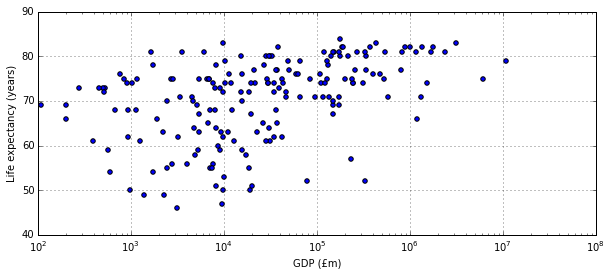

In [104]:
%matplotlib inline
gdpVsLife.plot(x=GDP, y=LIFE, kind='scatter', grid=True, logx=True, figsize = (10, 4))

### Tasks

- Swap the axes of the scatterplot, i.e. show the GDP in the y axis and the life expectancy in the x axis.
- Display a scatterplot of the GDP and the population.

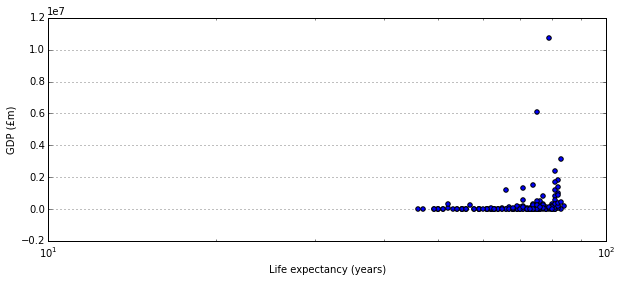

In [105]:
%matplotlib inline
gdpVsLife.plot(x=LIFE, y=GDP, kind='scatter', grid=True, logx=True, figsize = (10, 4))

**Now go back to the Exercise 11 step in FutureLearn to discuss and mark it complete.**